### **Tema 2: Procesamiento de imágenes digitales. Operaciones puntuales** 


In [43]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

Preparamos una función para calcular y dibujar el histograma(s) de una imagen en grises o en color.

In [44]:
def plot_hist(img: np.ndarray):
  """
    Función que dibuja el histograma de una imagen
  """
  hist_list = []
  if len(img.shape) == 2: # imagen en grises
    hist = cv2.calcHist([img],[0],None,[256],[0,256])
    hist_list.append(hist)
    plt.bar(range(0,256), hist.reshape(256,))      
  elif len(img.shape) == 3: # imagen BGR
    leg = ['hist B', 'hist G', 'hist R'] 
    colors = ['blue','green','red']   
    for i in range(0,3):
      hist = cv2.calcHist([img],[i],None,[256],[0,256])
      plt.plot(range(0,256), hist.reshape(256,),colors[i])
      hist_list.append(hist)
      plt.legend(leg)      

  plt.grid()
  plt.xlabel('Nivel de gris')
  plt.ylabel('Núm. píxels')

  return hist_list

Histograma de una imagen en niveles de gris

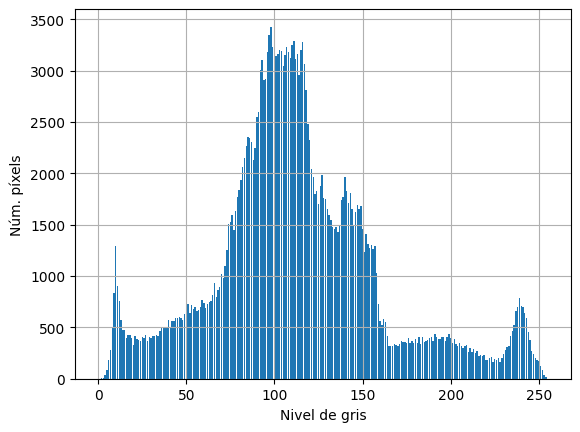

In [45]:
Igray = cv2.imread("./src/Lichtenstein_img_processing_test.png",0)
hist_gray = plot_hist(Igray)

Histogramas de los canales RGB de una imagen en color

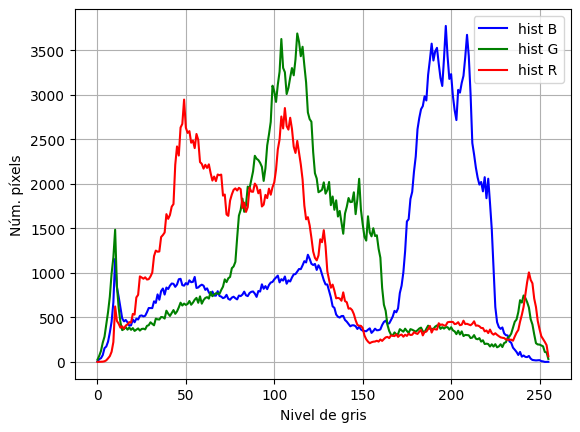

In [46]:
# Histograma de los canales BGR
Ibgr = cv2.imread("./src/Lichtenstein_img_processing_test.png")
hists_bgr = plot_hist(Ibgr)

El histograma es un vector con número de píxeles en cada nivel de gris. Por tanto, se puede utilizar para calcular el número de píxeles en la imagen:

In [47]:
# Calcular el número de píxeles de la imagen en grises:
print('num_pixels=', Igray.shape[0]*Igray.shape[1]) # ancho por alto
print('num_pixels_hist=', hist_gray[0].sum()) # Sumando las entradas en el histograma

num_pixels= 262144
num_pixels_hist= 262144.0


### **Operaciones puntuales**

En este apartado vamos a experimentar con algunas de las operaciones puntuales vistas en clase

Text(0.5, 1.0, 'Igray_inverted')

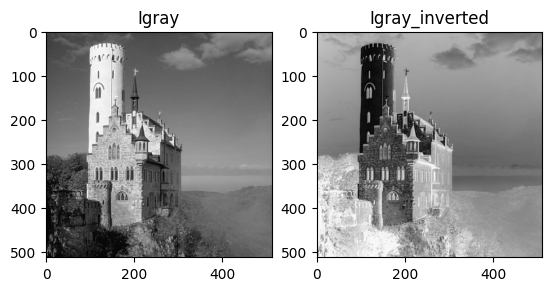

In [48]:
# Invertir el nivel de gris de una imagen
Igray_inv = 255 - Igray

plt.subplot(1, 2, 1)
plt.imshow(Igray, cmap="gray")
plt.title("Igray")
plt.subplot(1, 2, 2)
plt.imshow(Igray_inv, cmap="gray")
plt.title("Igray_inverted")

Text(0.5, 1.0, 'Iluna_thr')

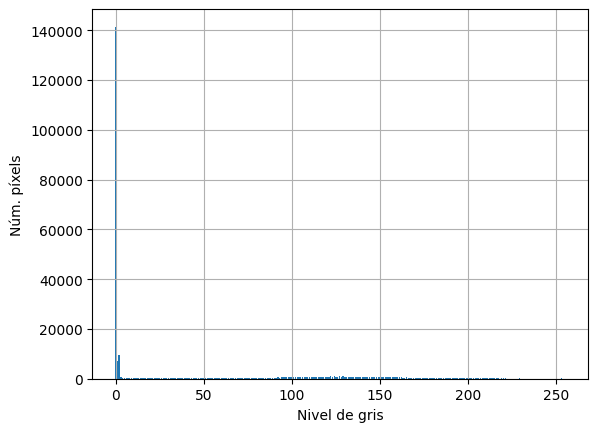

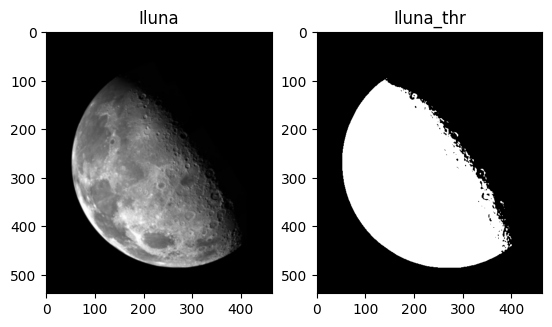

In [49]:
# Umbralizar una imagen
Iluna = cv2.imread("./src/luna.png", 0)

# Pintamos primero el histograma.
hist_luna = plot_hist(Iluna) 

# Del histograma se deduce que un umbral de 25 sería suficiente para separar
# los niveles de gris de la luna del fondo (mayoritariamente de color negro)
Iluna_thr = Iluna.copy()
th = 25
Iluna_thr[Iluna>th] = 255
Iluna_thr[Iluna<=th] = 0

# Pintar resultado
plt.figure()
plt.subplot(1, 2, 1)
plt.imshow(Iluna, cmap="gray")
plt.title("Iluna")

plt.subplot(1, 2, 2)
plt.imshow(Iluna_thr, cmap="gray")
plt.title("Iluna_thr")


### **Aumento de contraste por transformación lineal**

Vamos a ver ahora cómo podemos aumentar el contraste (diferencia entre el mayor nivel de gris y el menor del rango dinámico de una imagen en niveles de gris) de una manera muy sencilla.

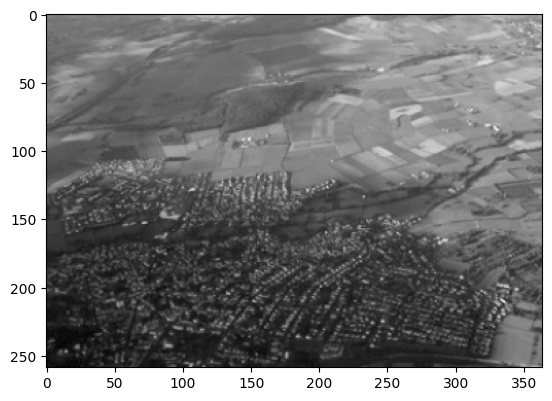

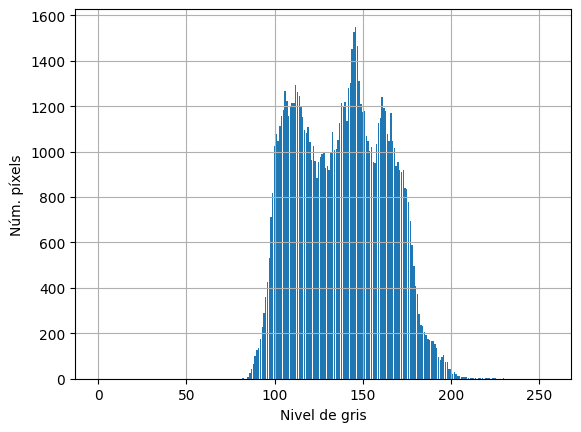

In [50]:
# Aumento de contraste
Iciudad = cv2.imread("./src/ciudad_desde_aire.png", 0) # leemos en niveles de gris
plt.imshow(Iciudad, cmap="gray")

plt.figure()
hist = plot_hist(Iciudad)

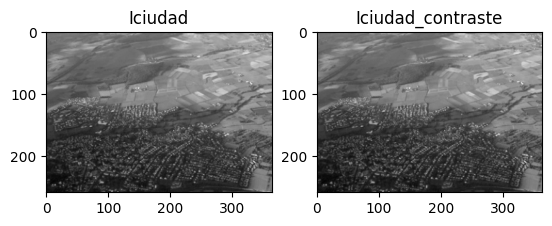

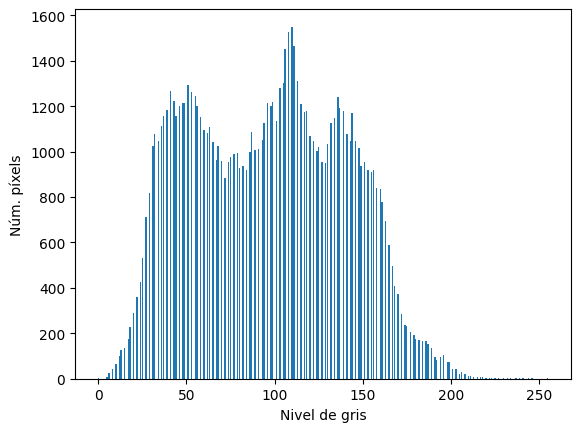

In [51]:
# Aumento de contraste lineal:
max_ = Iciudad.max()
min_ = Iciudad.min()
Iciudad_contraste = np.uint8(255.0 * ((Iciudad - min_) / (max_ - min_)))

plt.figure()
plt.subplot(1, 2, 1)
plt.imshow(Iciudad, cmap="gray")
plt.title("Iciudad")
plt.subplot(1, 2, 2)
plt.imshow(Iciudad_contraste, cmap="gray")
plt.title("Iciudad_contraste")

plt.figure()
hist = plot_hist(Iciudad_contraste)
plt.grid()

Parece que mejora el contraste, pero no todo lo que debería. La parte del histograma con más píxeles no llega al 255 en el nuevo histograma (el de Iciudad_contraste)

En el histograma original tenemos unos pocos (muy pocos) valores por encima de 230 y por debajo de 82 que al ser el mínimo y el máximo, no permiten "estirar" la parte informativa del histograma en el intervalo [82, 230]. Vamos a arreglar este problema.

Text(0.5, 1.0, 'Iciudad_contraste2')

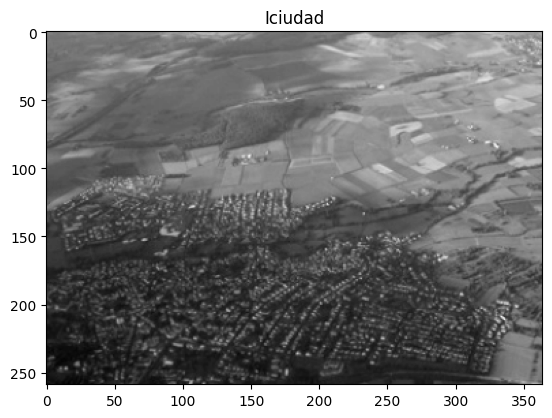

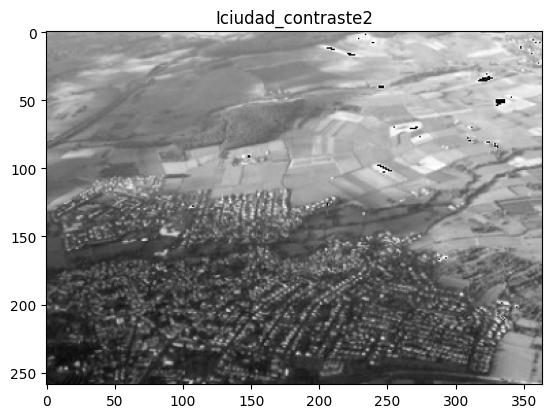

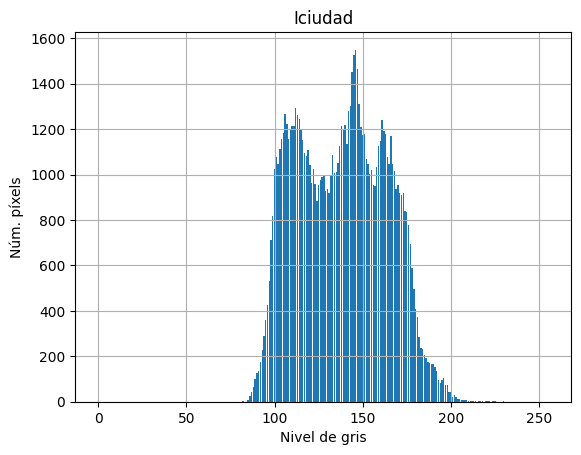

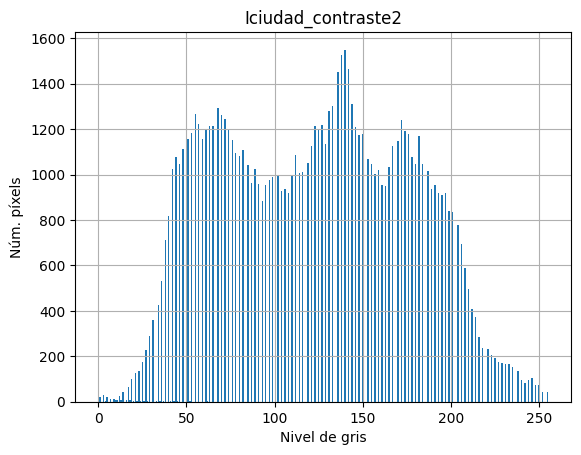

In [52]:
# Aumento de contraste lineal:
max_ = 200
min_ = 80
Iciudad_contraste2 = np.uint8(255.0 * ((Iciudad - min_) / (max_ - min_)))

plt.figure()
plt.imshow(Iciudad, cmap="gray")
plt.title("Iciudad")
plt.figure()
plt.imshow(Iciudad_contraste2, cmap="gray")
plt.title("Iciudad_contraste2")

plt.figure()
hist = plot_hist(Iciudad)
plt.title("Iciudad")
plt.figure()
hist = plot_hist(Iciudad_contraste2)
plt.title("Iciudad_contraste2")


### **Efecto sobre el contraste de operaciones ariméticas**


In [53]:
Iojo = cv2.imread("./src/ojo.png", 0)

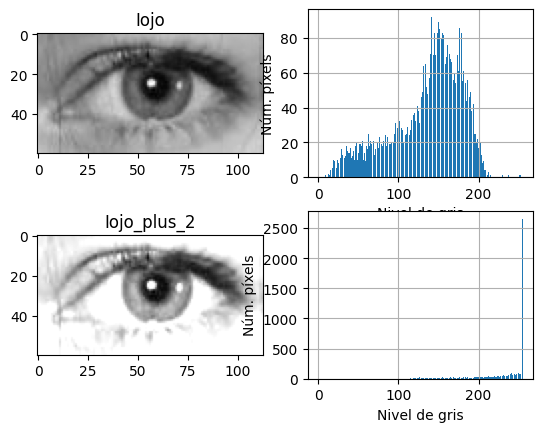

In [54]:
# Sumar una constante. Usamos las operaciones de OpenCV para tener artimética "saturante"
Iojo_plus_2 = cv2.add(Iojo, 100) # Disminuye el contraste: la mitad de los píxeles se han ido a 255

plt.figure()
plt.subplot(2, 2, 1)
plt.imshow(Iojo, cmap="gray")
plt.title("Iojo")
plt.subplot(2, 2, 2)
hist = plot_hist(Iojo)

plt.subplot(2, 2, 3)
plt.imshow(Iojo_plus_2, cmap="gray")
plt.title("Iojo_plus_2")
plt.subplot(2, 2, 4)
hist = plot_hist(Iojo_plus_2) 

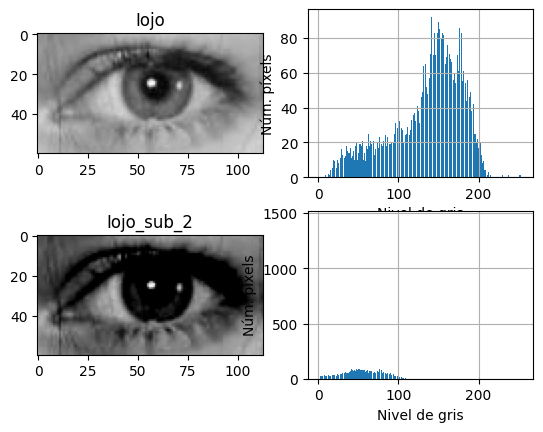

In [55]:
# Restar una constante disminuye el contraste
Iojo_sub_2 = cv2.subtract(Iojo, 100) # Disminuye el contraste: la mitad de los píxeles se han ido a 0

plt.figure()
plt.subplot(2, 2, 1)
plt.imshow(Iojo, cmap="gray")
plt.title("Iojo")
plt.subplot(2, 2, 2)
hist = plot_hist(Iojo)

plt.subplot(2, 2, 3)
plt.imshow(Iojo_sub_2, cmap="gray")
plt.title("Iojo_sub_2")
plt.subplot(2, 2, 4)
hist = plot_hist(Iojo_sub_2) 

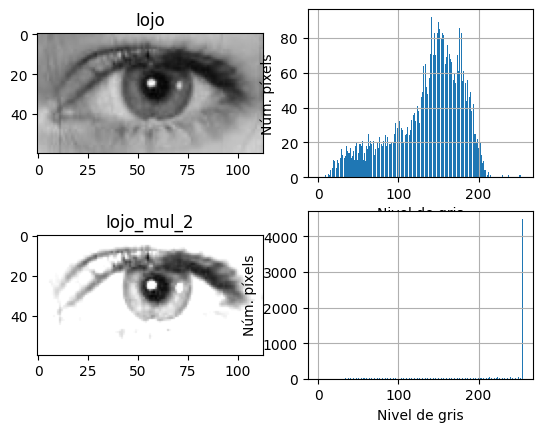

In [56]:
# Multiplicar por 2 disminuye el contraste
Iojo_mul_2 = cv2.multiply(Iojo, 2) # Disminuye el contraste: muchos los píxeles se han ido a 255

plt.figure()
plt.subplot(2, 2, 1)
plt.imshow(Iojo, cmap="gray")
plt.title("Iojo")
plt.subplot(2, 2, 2)
hist = plot_hist(Iojo)

plt.subplot(2, 2, 3)
plt.imshow(Iojo_mul_2, cmap="gray")
plt.title("Iojo_mul_2")
plt.subplot(2, 2, 4)
hist = plot_hist(Iojo_mul_2) 

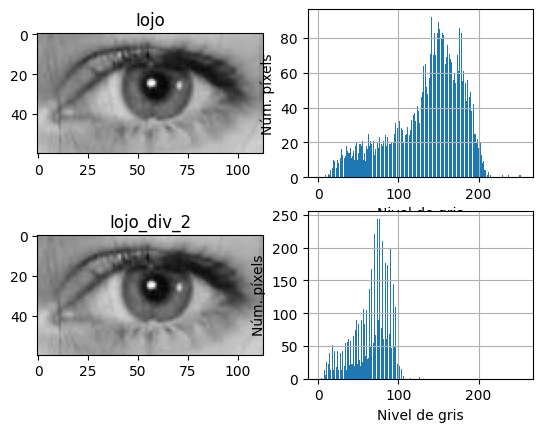

In [57]:
# Dividir por 2 disminuye el contraste
Iojo_div_2 = cv2.divide(Iojo, 2) # Disminuye el contraste: todos los píxeles por debajo de 100

plt.figure()
plt.subplot(2, 2, 1)
plt.imshow(Iojo, cmap="gray")
plt.title("Iojo")
plt.subplot(2, 2, 2)
hist = plot_hist(Iojo)

plt.subplot(2, 2, 3)
plt.imshow(Iojo_div_2, cmap="gray")
plt.title("Iojo_div_2")
plt.subplot(2, 2, 4)
hist = plot_hist(Iojo_div_2) 
